## ***                                                  EDA ASSIGNMENT                                                                 ***

## Given Data set :
   Haberman Cancer survival data set
## Features : 
   Apparently, there are three features to name as Age of patient, year of opeartion, Number of positive axillary nodes detected and there is a class attribute which is Survival status(Numerical value) ,defined as follows:
    1- Survived for 5 years or longer
    2- Died within 5 years.

## Objective:
   To do the exploratory data analysis with the motive of finding out any quantitaive or qualitative aspects of features which helps us in classifying patients into either class 1 or class 2 .

## Preliminary inspection of data set 

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Survival_status = 1 ,the patient survived 5 years or longer
# Survival_status = 2 , the patient died within 5 years.

colnames = ['age','year_of_operation','positive_axillary_nodes_detected','survival_status']
haberman = pd.read_csv('haberman.csv',names = colnames,header = None )
print(haberman.shape)
print(haberman.columns)
haberman.head(5)


(306, 4)
Index(['age', 'year_of_operation', 'positive_axillary_nodes_detected',
       'survival_status'],
      dtype='object')


,age,year_of_operation,positive_axillary_nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [72]:
haberman['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

## Observation 
Imbalanced data set

## Scatter plots

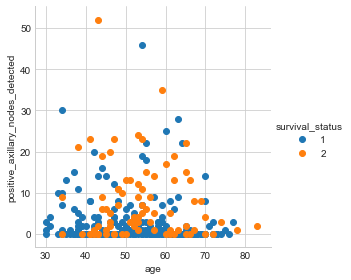

In [73]:
sns.set_style('whitegrid');
sgrid = sns.FacetGrid(haberman,hue='survival_status',size=4);
smap = sgrid.map(plt.scatter,'age','positive_axillary_nodes_detected')
smap.add_legend();
plt.show()


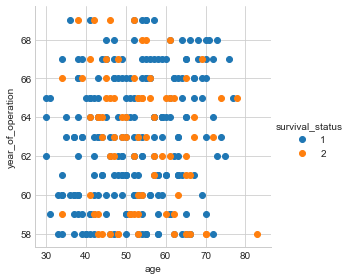

In [74]:
sns.set_style('whitegrid');
sgrid = sns.FacetGrid(haberman,hue='survival_status',size=4);
smap = sgrid.map(plt.scatter,'age','year_of_operation')
smap.add_legend();
plt.show()


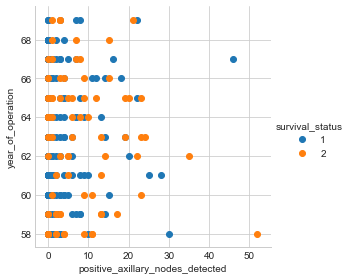

In [75]:
sns.set_style('whitegrid');
sgrid = sns.FacetGrid(haberman,hue='survival_status',size=4);
smap = sgrid.map(plt.scatter,'positive_axillary_nodes_detected','year_of_operation')
smap.add_legend();
plt.show()


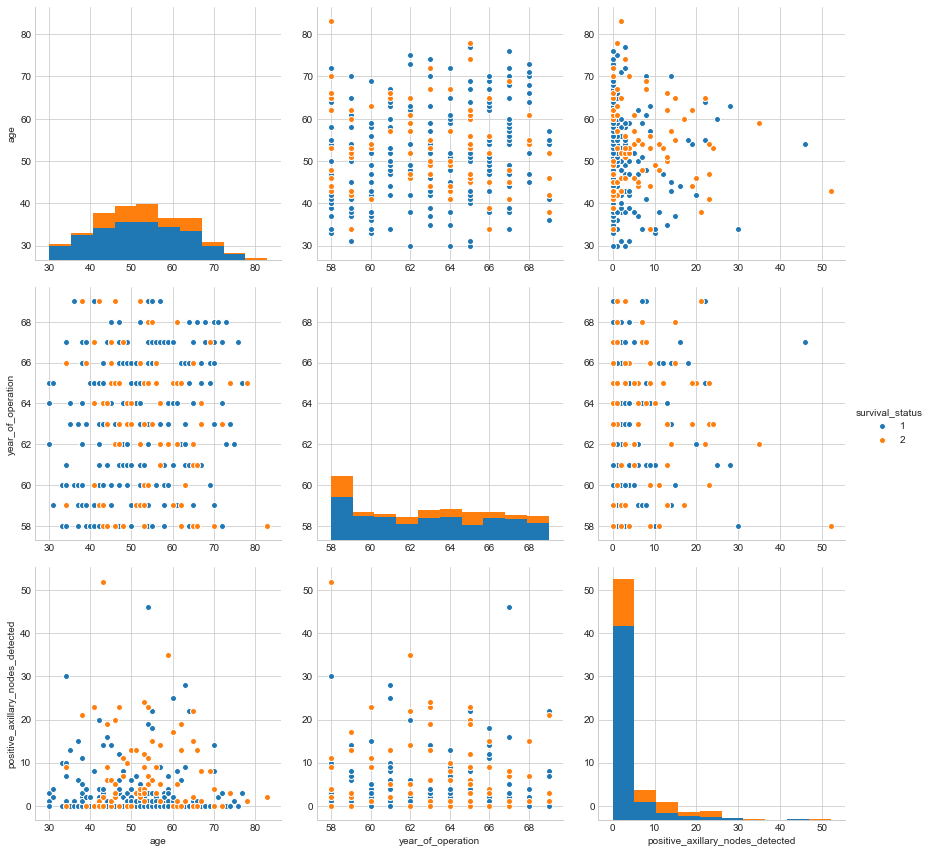

In [76]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman,hue='survival_status',vars =['age','year_of_operation','positive_axillary_nodes_detected'], size=4);
plt.show()

In [77]:
haberman.dtypes

age                                 int64
year_of_operation                   int64
positive_axillary_nodes_detected    int64
survival_status                     int64
dtype: object

# Observations :
1. All the three features are overlapping with each other.
2. None of them are significantly helpful to identify the survival status as apparent from the above scatter and pair plots.

# Histogram, PDF and CDF

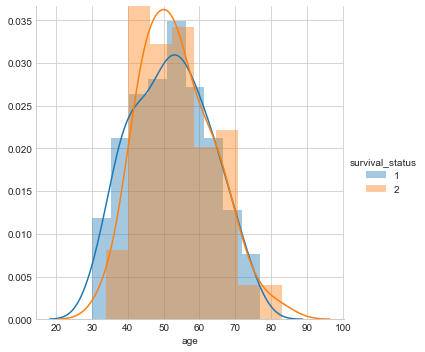

In [78]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


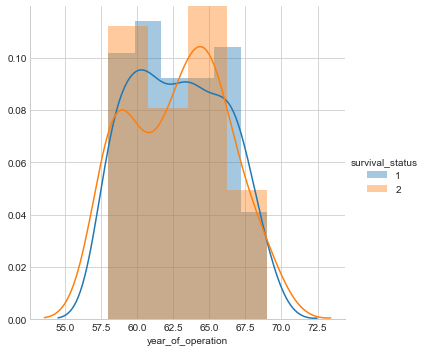

In [79]:
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "year_of_operation") \
   .add_legend();
plt.show();

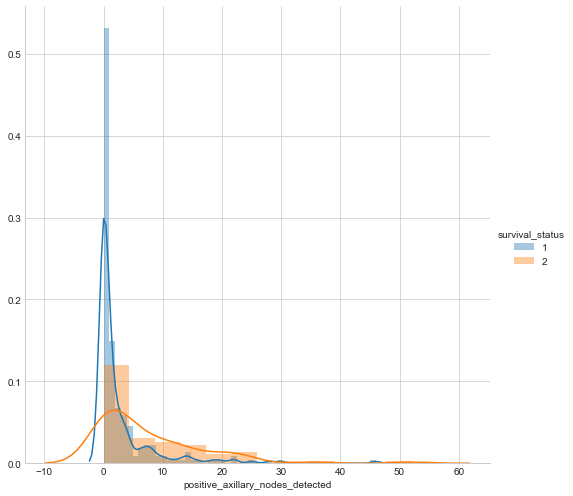

In [80]:
sns.FacetGrid(haberman, hue="survival_status", size= 7) \
   .map(sns.distplot, 'positive_axillary_nodes_detected') \
   .add_legend();
plt.show();


## Mean, Median and Variance

In [81]:
def statistiks(haberman):
    from statsmodels import robust
    statistik = pd.DataFrame(columns= ['age','year_of_operation','positive_lymph_nodes'],
                             index=['Mean','Std_Dev','Median','MAD','25th_percentile','50th_percentile','75th_percentile','100th_percentile'])
    statistik.loc['Mean','age'] = np.mean(haberman[str(list(haberman.columns.values)[0])])
    statistik.loc['Std_Dev','age']=np.std(haberman[str(list(haberman.columns.values)[0])])
    statistik.loc['Median','age']=np.median(haberman[str(list(haberman.columns.values)[0])])
    statistik.loc['MAD','age'] = robust.mad(haberman[str(list(haberman.columns.values)[0])])
    statistik.loc['25th_percentile','age'] = np.percentile(haberman[str(list(haberman.columns.values)[0])],25)
    statistik.loc['50th_percentile','age'] = np.percentile(haberman[str(list(haberman.columns.values)[0])],50)
    statistik.loc['75th_percentile','age'] = np.percentile(haberman[str(list(haberman.columns.values)[0])],75)
    statistik.loc['100th_percentile','age'] = np.percentile(haberman[str(list(haberman.columns.values)[0])],100)
    
    statistik.loc['Mean','year_of_operation'] = np.mean(haberman[str(list(haberman.columns.values)[1])])
    statistik.loc['Std_Dev','year_of_operation']=np.std(haberman[str(list(haberman.columns.values)[1])])
    statistik.loc['Median','year_of_operation']=np.median(haberman[str(list(haberman.columns.values)[1])])
    statistik.loc['MAD','year_of_operation'] = robust.mad(haberman[str(list(haberman.columns.values)[1])])
    statistik.loc['25th_percentile','year_of_operation'] = np.percentile(haberman[str(list(haberman.columns.values)[1])],25)
    statistik.loc['50th_percentile','year_of_operation'] = np.percentile(haberman[str(list(haberman.columns.values)[1])],50)
    statistik.loc['75th_percentile','year_of_operation'] = np.percentile(haberman[str(list(haberman.columns.values)[1])],75)
    statistik.loc['100th_percentile','year_of_operation'] = np.percentile(haberman[str(list(haberman.columns.values)[1])],100)
    
    statistik.loc['Mean','positive_lymph_nodes'] = np.mean(haberman[str(list(haberman.columns.values)[2])])
    statistik.loc['Std_Dev','positive_lymph_nodes']=np.std(haberman[str(list(haberman.columns.values)[2])])
    statistik.loc['Median','positive_lymph_nodes']=np.median(haberman[str(list(haberman.columns.values)[2])])
    statistik.loc['MAD','positive_lymph_nodes'] = robust.mad(haberman[str(list(haberman.columns.values)[2])])
    statistik.loc['25th_percentile','positive_lymph_nodes'] = np.percentile(haberman[str(list(haberman.columns.values)[2])],25)
    statistik.loc['50th_percentile','positive_lymph_nodes'] = np.percentile(haberman[str(list(haberman.columns.values)[2])],50)
    statistik.loc['75th_percentile','positive_lymph_nodes'] = np.percentile(haberman[str(list(haberman.columns.values)[2])],75)
    statistik.loc['100th_percentile','positive_lymph_nodes'] = np.percentile(haberman[str(list(haberman.columns.values)[2])],100)
    
    return statistik
    
  
 

In [99]:
haberman_above5 = haberman.loc[haberman['survival_status'] == 1]  # Extracting subset of the data for the both the classes.
haberman_below5 = haberman.loc[haberman['survival_status'] == 2]

print('\nStatistics for the patients who survived more than 5 years are ')
display (statistiks(haberman_above5))
print('\nStatistics for the patients who couldnt survive for more than 5 years are ')
display(statistiks(haberman_below5))


Statistics for the patients who survived more than 5 years are 


,age,year_of_operation,positive_lymph_nodes
Mean,52.0178,62.8622,2.79111
Std_Dev,10.9877,3.21575,5.85726
Median,52,63,0
MAD,13.3434,4.44781,0
25th_percentile,43,60,0
50th_percentile,52,63,0
75th_percentile,60,66,3
100th_percentile,77,69,46



Statistics for the patients who couldnt survive for more than 5 years are 


,age,year_of_operation,positive_lymph_nodes
Mean,53.679,62.8272,7.45679
Std_Dev,10.1042,3.32142,9.12878
Median,53,63,4
MAD,11.8608,4.44781,5.93041
25th_percentile,46,59,1
50th_percentile,53,63,4
75th_percentile,61,65,11
100th_percentile,83,69,52


## Observation :
1. The distributions of variables (features here) are overlapping for each class of survival status.

2. The prior observations from the multivariate plots like Scatter plot and Pairplot can be given weight.

4. Histogram plot for lymph_nodes shows that there exists patients with negative number of nodes detected.Since negative number of lymph nodes implies those which are not affected by Cancer cells, we could try removing these datapoints and there may be a possibility to find the actual threshold of number of positive lymph that leads to less chance of survival.

In [100]:
## Giving a try at the 4th observation above

haberman_neg_lymph = haberman.loc[haberman['positive_axillary_nodes_detected'] <= 0]
print(len(haberman_neg_lymph))
haberman_pos_lymph = haberman.loc[haberman['positive_axillary_nodes_detected'] > 0]
print(len(haberman_pos_lymph))


136
170


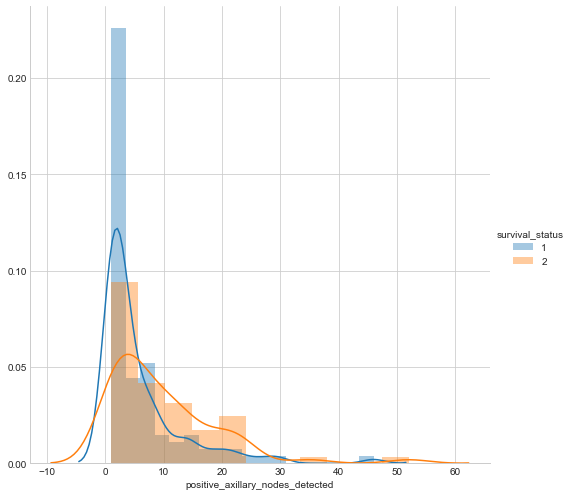

In [101]:

plt.close()
sns.FacetGrid(haberman_pos_lymph, hue="survival_status", size= 7) \
   .map(sns.distplot, 'positive_axillary_nodes_detected') \
   .add_legend();
plt.show();


In [102]:
haberman_above5_only_pos = haberman_pos_lymph.loc[haberman_pos_lymph['survival_status'] == 1]
haberman_below5_only_pos = haberman_pos_lymph.loc[haberman_pos_lymph['survival_status'] == 2]


In [86]:
print('\nAfter the above filtering,')

print('\nStatistics for the patients who survived more than 5 years are ')
display (statistiks(haberman_above5_only_pos))
print('\nStatistics for the patients who couldnt survive for more than 5 years are ')
display(statistiks(haberman_below5_only_pos))


After the above filtering,

Statistics for the patients who survived more than 5 years are 


,age,year_of_operation,positive_lymph_nodes
Mean,49.787,62.5,5.81481
Std_Dev,10.3656,3.21887,7.34109
Median,50,62,3
MAD,11.1195,4.44781,2.9652
25th_percentile,42,60,1
50th_percentile,50,62,3
75th_percentile,56,65,7
100th_percentile,77,69,46



Statistics for the patients who couldnt survive for more than 5 years are 


,age,year_of_operation,positive_lymph_nodes
Mean,54.371,62.9194,9.74194
Std_Dev,9.59374,3.39021,9.30649
Median,53,63,7
MAD,10.3782,4.44781,7.41301
25th_percentile,47.25,60,3
50th_percentile,53,63,7
75th_percentile,60.75,65,13
100th_percentile,83,69,52


## Observations:
1. It could be said that the patients with positive lymph nodes less than 6 had higher chances of surviving more than 5 years.
   However,this doesn't help much in the classification, as the data points are overlapping for both the class.
2. Year of operation,again,doesn't help much for the objective.Its distribution is more dor less the same for both the clases.We    can drop it.

3. I couldnot understand why negative lymph nodes are still present in the histogram of the filtered data.


## ***The following analysis is done with the given ORIGINAL data without any filtering***

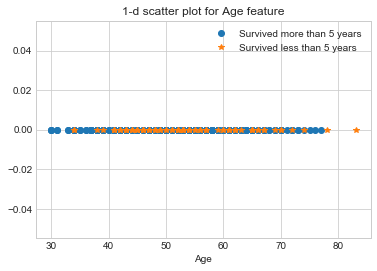

In [87]:
### 1-D Scatter plot

haberman_above5 = haberman.loc[haberman['survival_status'] == 1]
haberman_below5 = haberman.loc[haberman['survival_status'] == 2]

fig1, = plt.plot(haberman_above5['age'], np.zeros_like(haberman_above5['age']), 'o')
fig2, = plt.plot(haberman_below5['age'], np.zeros_like(haberman_below5['age']), '*')
plt.legend([fig1,fig2], ['Survived more than 5 years','Survived less than 5 years'])
plt.xlabel('Age')
plt.title('1-d scatter plot for Age feature')
plt.show()

## Observation : 
1. We couldn't infer much as most of the data points are overlapping.
2. Although it can be seen that most of the patients who survived less than 5 years are in the age between 40 and 63, it is not useful for our objective.

## PDF and CDF of all features

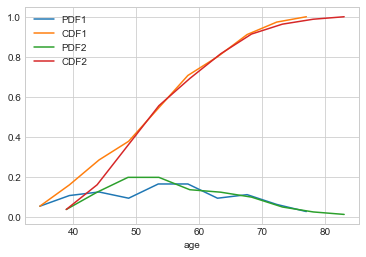

,bin_edges1,pdistf1,cdistf1,bin_edges2,pdistf2,cdistf2
0,34.7,0.053333,0.053333,38.9,0.037037,0.037037
1,39.4,0.106667,0.160000,43.8,0.123457,0.160494
2,44.1,0.124444,0.284444,48.7,0.197531,0.358025
3,48.8,0.093333,0.377778,53.6,0.197531,0.555556
4,53.5,0.164444,0.542222,58.5,0.135802,0.691358
5,58.2,0.164444,0.706667,63.4,0.123457,0.814815
6,62.9,0.093333,0.800000,68.3,0.098765,0.913580
7,67.6,0.111111,0.911111,73.2,0.049383,0.962963
8,72.3,0.062222,0.973333,78.1,0.024691,0.987654
9,77.0,0.026667,1.000000,83.0,0.012346,1.000000


(None, None)

In [88]:
def cdf_pdf_plot(haberman,age):
    haberman_above5 = haberman.loc[haberman['survival_status'] == 1]
    haberman_below5 = haberman.loc[haberman['survival_status'] == 2]
    
    hist, bin_edges = np.histogram(haberman_above5[str(age)], bins=10, 
                                 density = True)
    pdf = hist/(sum(hist))
    cdf = np.cumsum(pdf)
    a, = plt.plot(bin_edges[1:],pdf)
    b, =plt.plot(bin_edges[1:], cdf)

    hist1, bin_edges1 = np.histogram(haberman_below5[str(age)], bins=10, 
                                 density = True)
    pdf1 = hist1/(sum(hist1))
    cdf1 = np.cumsum(pdf1)
    c, = plt.plot(bin_edges1[1:],pdf1)
    d, =plt.plot(bin_edges1[1:], cdf1)
    plt.legend([a,b,c,d], ['PDF1','CDF1','PDF2','CDF2'])
    plt.xlabel(age)
    da = {'bin_edges1':bin_edges[1:],'pdistf1':pdf, 'cdistf1':cdf,'bin_edges2':bin_edges1[1:],'pdistf2':pdf1, 'cdistf2':cdf1}
    df = pd.DataFrame(da,columns=['bin_edges1','pdistf1','cdistf1','bin_edges2','pdistf2','cdistf2'])
    return (plt.show(),display(df))

age = list(haberman.columns.values)[0]
cdf_pdf_plot(haberman,age)



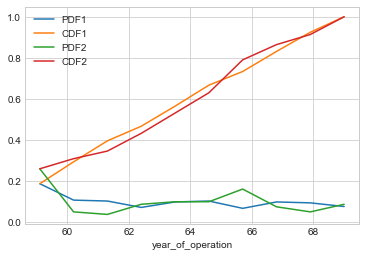

,bin_edges1,pdistf1,cdistf1,bin_edges2,pdistf2,cdistf2
0,59.1,0.186667,0.186667,59.1,0.259259,0.259259
1,60.2,0.106667,0.293333,60.2,0.049383,0.308642
2,61.3,0.102222,0.395556,61.3,0.037037,0.345679
3,62.4,0.071111,0.466667,62.4,0.086420,0.432099
4,63.5,0.097778,0.564444,63.5,0.098765,0.530864
5,64.6,0.102222,0.666667,64.6,0.098765,0.629630
6,65.7,0.066667,0.733333,65.7,0.160494,0.790123
7,66.8,0.097778,0.831111,66.8,0.074074,0.864198
8,67.9,0.093333,0.924444,67.9,0.049383,0.913580
9,69.0,0.075556,1.000000,69.0,0.086420,1.000000


(None, None)

In [89]:
year = list(haberman.columns.values)[1]
cdf_pdf_plot(haberman,year)

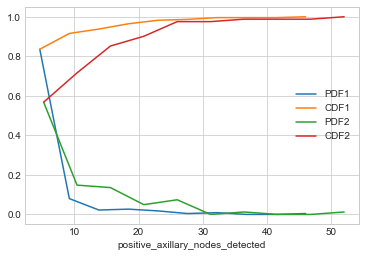

,bin_edges1,pdistf1,cdistf1,bin_edges2,pdistf2,cdistf2
0,4.6,0.835556,0.835556,5.2,0.567901,0.567901
1,9.2,0.080000,0.915556,10.4,0.148148,0.716049
2,13.8,0.022222,0.937778,15.6,0.135802,0.851852
3,18.4,0.026667,0.964444,20.8,0.049383,0.901235
4,23.0,0.017778,0.982222,26.0,0.074074,0.975309
5,27.6,0.004444,0.986667,31.2,0.000000,0.975309
6,32.2,0.008889,0.995556,36.4,0.012346,0.987654
7,36.8,0.000000,0.995556,41.6,0.000000,0.987654
8,41.4,0.000000,0.995556,46.8,0.000000,0.987654
9,46.0,0.004444,1.000000,52.0,0.012346,1.000000


(None, None)

In [90]:
lymph_nodes = list(haberman.columns.values)[2]
cdf_pdf_plot(haberman,lymph_nodes)



## Observations:
1. CDF's and PDF's of all the features are almost aligning for each class.
2. 84% of the patients who survived for more than 5 years have lymph nodes less than 5.Just a metric to say,but doesn't serve the objective.

## Boxplots 

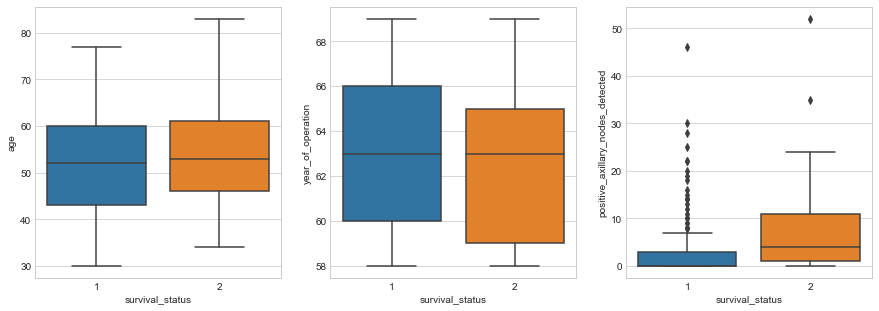

In [91]:
plt.close()
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3,figsize =(15,5))
sns.boxplot(x='survival_status',y='age', data=haberman,ax = ax1)
sns.boxplot(x='survival_status',y='year_of_operation', data=haberman,ax = ax2)
sns.boxplot(x='survival_status',y='positive_axillary_nodes_detected', data=haberman,ax = ax3)
plt.show()

## Violin plots

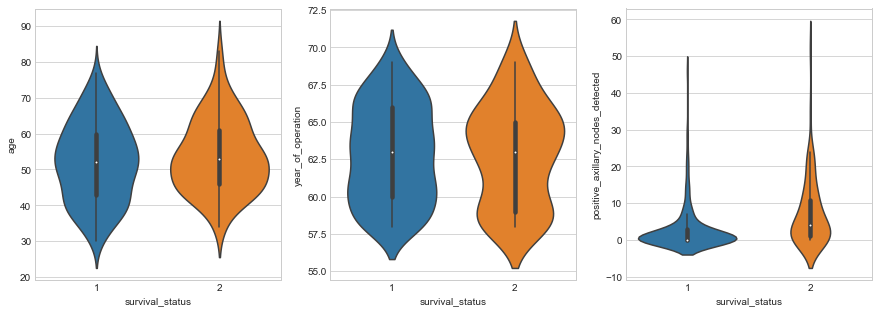

In [92]:
plt.close()
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3,figsize =(15,5))
sns.violinplot(x='survival_status',y='age', data=haberman,ax = ax1)
sns.violinplot(x='survival_status',y='year_of_operation', data=haberman,ax = ax2)
sns.violinplot(x='survival_status',y='positive_axillary_nodes_detected', data=haberman,ax = ax3)
plt.show()

## Observations
1. The median(50the percentile) of distibution of positive axiliary nodes detected is equal to 0 for people living more than 5 years.Patients with positive lymphnodes less than 3(between 25th and 75th percentile) has higher chance of survival.***(This is for the original data)***

2. Distributions are highly overlapping, and large no. of outliers are present in the lymph nodes distribution for patients who survived more than 5 years.


###  Since the data set is imbalanced, I once tried to randomly sample out 50 data points for each case and see if any new info could be drawn.


In [93]:
uniform_above5 = haberman_above5.sample(50)
uniform_below5 = haberman_below5.sample(50)

In [94]:
uniform_haberman = pd.concat([uniform_above5,uniform_below5])

In [95]:
len(uniform_haberman)

100

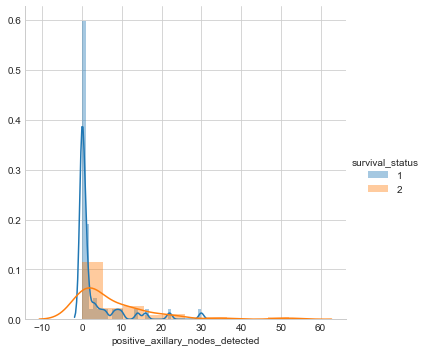

In [96]:
sns.FacetGrid(uniform_haberman, hue="survival_status", size=5) \
   .map(sns.distplot, 'positive_axillary_nodes_detected') \
   .add_legend();
plt.show();


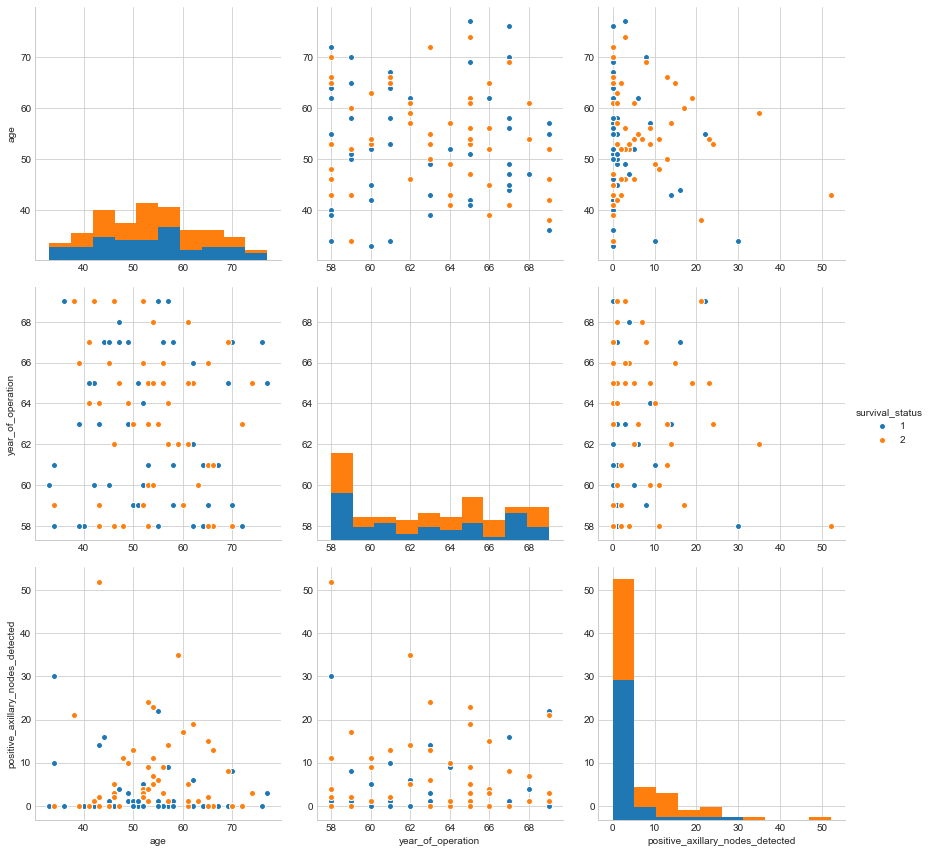

In [97]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(uniform_haberman,hue='survival_status',vars =['age','year_of_operation','positive_axillary_nodes_detected'], size=4);
plt.show()

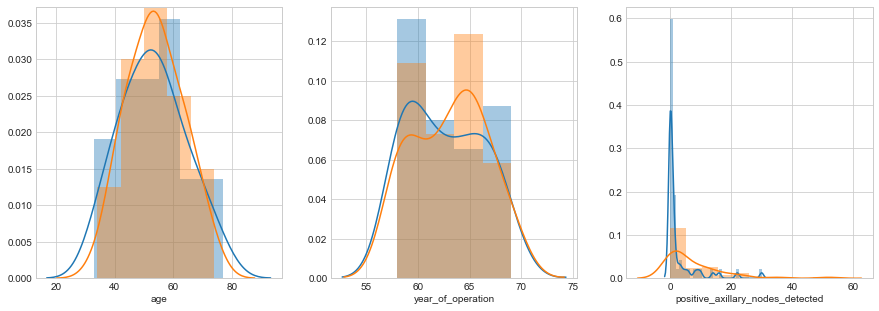

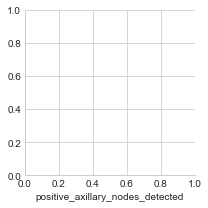

In [98]:
plt.close()
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3,figsize =(15,5))
uniform_plot = sns.FacetGrid(uniform_haberman,hue = 'survival_status')
uniform_plot.map(sns.distplot,'age',ax = ax1 )
uniform_plot.map(sns.distplot,'year_of_operation',ax = ax2 )
uniform_plot.map(sns.distplot,'positive_axillary_nodes_detected',ax = ax3 )
#plt.tight_layout()
plt.show()

## Observations:

* Nothing new could be inferred as all the distributions of all the features are overlapping for both the classes.


## ***Conclusion:***

* Given data set is imbalanced
* Distributions of all the features all largely overlapping, thus not allowing for classfication in the current space.
  Transformation of features to higher dimension may help us.